In [1]:
# Editor appearance set up & Load plot & Calculate DGCI

# Extend width of Jupyter Notebook Cell to the size of browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Import packages needed
import gc
import pickle
from tkinter import Tk
from tkinter.filedialog import askopenfilename, asksaveasfilename
import platform


from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.widgets import RectangleSelector, PolygonSelector
import numpy as np
from skimage import io, draw
import mplcursors
import IPython.display as Disp
from ipywidgets import widgets
import cv2
from osgeo import gdal
import pandas as pd


# OS related settings
if platform.system() == 'Windows':
    # %matplotlib nbagg
    # Sometimes tk/qt will not let cells rerun after an ERROR occurs
    # %matplotlib tk
    %matplotlib qt
elif platform.system() == 'Darwin':
    Tk().withdraw()
    %matplotlib osx
elif platform == 'linex' or platform == 'linux2':
    ;
# This line of "print" must exist right after %matplotlib command, 
# otherwise JN will hang on the first import statement after this.
print('Interactive plot activated')



# Load image and print size & pre-process

# Use skimage to load multi-layer tiff file

# image_file = askopenfilename(title='Load image file', initialdir='./output/field_image')
image_file = '/Users/lj/Downloads/20190814_141801_211.TIFF'
img = io.imread(image_file)
print("Original Image Shape: ", img.shape)


# Load GPS coordinate from file & Calculate pixel location
plot_loc = askopenfilename(title='Load plot location file', initialdir='./output/plot_location')
try:
    with open(plot_loc, 'rb') as f:
        plot_names = np.array(pickle.load(f))
        plot_vertices_gps = pickle.load(f)
except Exception as e:
    showerror(type(e).__name__, str(e))

# Calculating pixel location from GPS coordinate
ds = gdal.Open(image_file)
gt = ds.GetGeoTransform()
a, b, c, d, e, f = gt

plot_vertices = []
for i in range(len(plot_vertices_gps)):
    one_plot_vertices_gps = plot_vertices_gps[i]
    one_plot_vertices = []
    for vertex in one_plot_vertices_gps:
        xgeo, ygeo = vertex
        
        x = (xgeo - a) / b
        y = (ygeo - d) / f

        one_plot_vertices.append([x, y])
    one_plot_vertices = np.array(one_plot_vertices)
    one_plot_vertices = np.round(one_plot_vertices)
    one_plot_vertices = one_plot_vertices.astype(int)
    plot_vertices.append(one_plot_vertices)

print('Plot location loaded')

all_vertices = np.concatenate(plot_vertices, axis=0)
ul = np.amin(all_vertices, axis=0)
br = np.amax(all_vertices, axis=0)


# rgb_ir_img = rgb_ir_img[ul[1]:br[1], ul[0]:br[0], :]
print("Trimmed Image Shape: ", rgb_ir_img.shape)


# Extract layers from the multilayer tiff file and do some adjustments
layer_RGB = rgb_ir_img[:, :, 0:3]
# layer_IR = rgb_ir_img[:, :, 3]
layer_mask = rgb_ir_img[:, :, 3]

# Change from 16 bit to 8 bit(max 65535 to max 255)
# layer_RGB = np.round(layer_RGB / 257)
# layer_RGB = layer_RGB.astype(int)

# Set background to black (You can choose background color when exporting orthomosaic from agisoft, 
# the default is white)
# layer_RGB[np.where(layer_mask == 0)] = 0
# layer_IR[np.where(layer_mask == 0)] = 0




# RGB to HSV (H 0-1, S 0-1, V 0-255)

layer_HSV = matplotlib.colors.rgb_to_hsv(layer_RGB)

layer_hue = layer_HSV[:, :, 0]
layer_saturation = layer_HSV[:, :, 1]
layer_value = layer_HSV[:, :, 2]


# Calculate Vegetation Index and display

# Original formula
# DGCI = ((layer_HSV[:, :, 0] - 60) / 60 + (1 - layer_HSV[:, :, 1]) + (1 - layer_HSV[:, :, 2]/255)) / 3

layer_DGCI = (layer_hue * 360 / 60 + (1 - layer_saturation) + (1 - layer_value / 255)) / 3 

print('DGCI calculated')

# Reduce use of memory
gc.collect()

# Play sound when done
def done():
    print('\nDone')

    # Play sound when done
    
    if platform.system() == 'Windows':
        import winsound
        winsound.Beep(500, 1000)
    elif platform.system() == 'Darwin':
        import os
        os.system( "say Done" )
    elif platform == 'linex' or platform == 'linux2':
        import os
        os.system( "say Done" )

done()

Interactive plot activated
Original Image Shape:  (512, 640)
Plot location loaded


NameError: name 'rgb_ir_img' is not defined

Original Image Shape:  (512, 640)
7406
7921


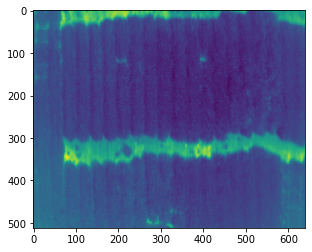

In [7]:
image_file = '/Users/lj/Downloads/20190814_141801_211.TIFF'
img = io.imread(image_file)
print("Original Image Shape: ", img.shape)
plt.figure()
plt.imshow(img)

print(np.min(img))
print(np.max(img))

Original Image Shape:  (512, 640)
30.066101
60.71673


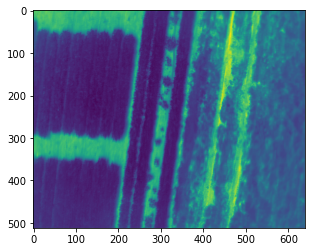

In [8]:
image_file = '/Users/lj/Downloads/20190805_135048_121_R.tif'
img = io.imread(image_file)
print("Original Image Shape: ", img.shape)
plt.figure()
plt.imshow(img)

print(np.min(img))
print(np.max(img))

Original Image Shape:  (2558, 5000, 2)
-0.0
255.0


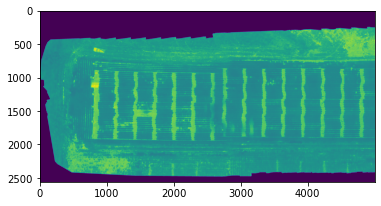

In [5]:
image_file = '/Users/lj/Downloads/BRC_20190805_134604_IR_Pix4D_transparent_mosaic_grayscale_1_1.tif'
img = io.imread(image_file)
print("Original Image Shape: ", img.shape)
plt.figure()
plt.imshow(img[:, :, 0])

print(np.min(img))
print(np.max(img))

In [6]:
# Editor appearance set up & Load plot & Calculate DGCI

# Extend width of Jupyter Notebook Cell to the size of browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Import packages needed
import gc
import pickle
from tkinter import Tk
from tkinter.filedialog import askopenfilename, asksaveasfilename
import platform


from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.widgets import RectangleSelector, PolygonSelector
import numpy as np
from skimage import io, draw
import mplcursors
import IPython.display as Disp
from ipywidgets import widgets
import cv2
from osgeo import gdal
import pandas as pd

[[[0.13492083 0.53575549 0.08132164]
  [0.00101139 0.51959141 0.95555908]
  [0.5056269  0.65018117 0.12437112]
  [0.0055294  0.92508762 0.28643901]]

 [[0.66249136 0.72180415 0.96327653]
  [0.12823146 0.96707777 0.88416435]
  [0.95966345 0.63670465 0.3750031 ]
  [0.34659664 0.76132662 0.54359124]]

 [[0.64079444 0.25074437 0.69482177]
  [0.7811159  0.80934872 0.5394802 ]
  [0.2705676  0.2644517  0.97754889]
  [0.60961796 0.0338988  0.34747174]]

 [[0.07221618 0.20376893 0.20888009]
  [0.56119395 0.27964462 0.72680575]
  [0.06310724 0.83514856 0.15586002]
  [0.40321321 0.62436352 0.05440591]]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[[0.13492083 0.53575549 0.08132164]
  [0.00101139 0.51959141 0.95555908]
  [0.5056269  0.65018117 0.12437112]
  [0.0055294  0.92508762 0.28643901]]

 [[0.66249136 0.72180415 0.96327653]
  [0.12823146 0.96707777 0.88416435]
  [0.95966345 0.63670465 0.3750031 ]
  [0.34659664 0.76132662 0.54359124]]

 [[0.64079444 0.25074437 0.69482177]
  

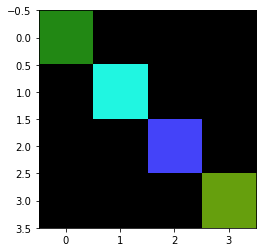

In [19]:
rgb = np.random.rand(4, 4, 3)
print(rgb)
mask = np.identity(4)
print(mask)

rgb2 = rgb
print(rgb2)

rgb[np.where(mask==0)] = 0
print(rgb)

print()

print(rgb2)

plt.imshow(mask)
plt.imshow(rgb)
print(rgb2[: ,:, 0])

In [23]:
rgb[0:3, 0:3]

array([[[0.13492083, 0.53575549, 0.08132164],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.12823146, 0.96707777, 0.88416435],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.2705676 , 0.2644517 , 0.97754889]]])